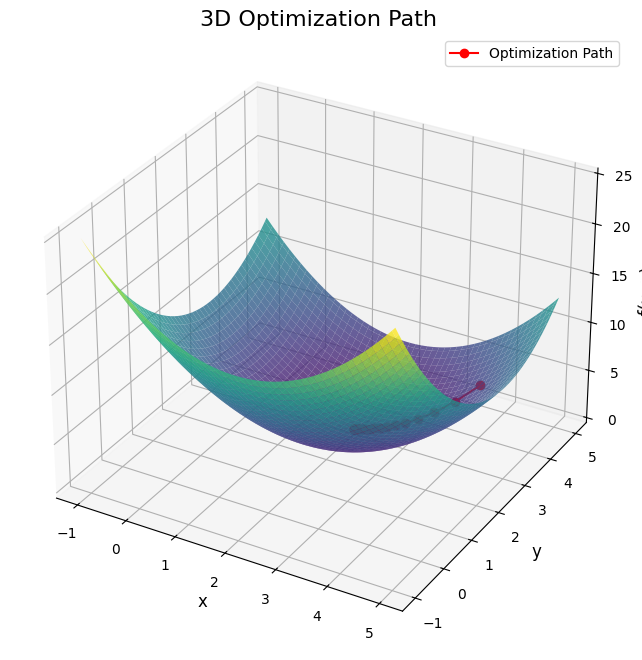

Optimization Path (x, y):
Step 0: x = 4.0000, y = 4.0000, f(x, y) = 5.0000
Step 1: x = 3.6000, y = 3.8000, f(x, y) = 3.2000
Step 2: x = 3.2800, y = 3.6400, f(x, y) = 2.0480
Step 3: x = 3.0240, y = 3.5120, f(x, y) = 1.3107
Step 4: x = 2.8192, y = 3.4096, f(x, y) = 0.8389
Step 5: x = 2.6554, y = 3.3277, f(x, y) = 0.5369
Step 6: x = 2.5243, y = 3.2621, f(x, y) = 0.3436
Step 7: x = 2.4194, y = 3.2097, f(x, y) = 0.2199
Step 8: x = 2.3355, y = 3.1678, f(x, y) = 0.1407
Step 9: x = 2.2684, y = 3.1342, f(x, y) = 0.0901
Step 10: x = 2.2147, y = 3.1074, f(x, y) = 0.0576
Step 11: x = 2.1718, y = 3.0859, f(x, y) = 0.0369
Step 12: x = 2.1374, y = 3.0687, f(x, y) = 0.0236
Step 13: x = 2.1100, y = 3.0550, f(x, y) = 0.0151
Step 14: x = 2.0880, y = 3.0440, f(x, y) = 0.0097
Step 15: x = 2.0704, y = 3.0352, f(x, y) = 0.0062
Step 16: x = 2.0563, y = 3.0281, f(x, y) = 0.0040
Step 17: x = 2.0450, y = 3.0225, f(x, y) = 0.0025
Step 18: x = 2.0360, y = 3.0180, f(x, y) = 0.0016
Step 19: x = 2.0288, y = 3.0144, f

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 함수 정의 및 Gradient 계산
def func(x, y):
    return x**2 + y**2 - 4*x - 6*y + 13

def gradient(x, y):
    grad_x = 2*x - 4
    grad_y = 2*y - 6
    return np.array([grad_x, grad_y])

# 2. 초기 값 및 학습률 설정
start_point = np.array([4.0, 4.0])  # 초기 시작 지점
learning_rate = 0.1  # 학습률
threshold = 1e-5  # 수렴 기준
max_iterations = 100  # 최대 반복 횟수

# 3. 경사 하강법 수행
points = [start_point]  # 경로 저장
for _ in range(max_iterations):
    current_point = points[-1]
    grad = gradient(*current_point)
    next_point = current_point - learning_rate * grad
    points.append(next_point)
    # 수렴 조건 체크
    if np.linalg.norm(grad) < threshold:
        break

# 4. 3D 그래프 시각화
x = np.linspace(-1, 5, 100)
y = np.linspace(-1, 5, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D Surface Plot
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# 경로 시각화
path_points = np.array(points)
path_x = path_points[:, 0]
path_y = path_points[:, 1]
path_z = func(path_x, path_y)

ax.plot(path_x, path_y, path_z, color='red', marker='o', label="Optimization Path")

# 그래프 설정
ax.set_title("3D Optimization Path", fontsize=16)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('f(x, y)', fontsize=12)
ax.legend()

plt.show()

# 5. 경로 출력
print("Optimization Path (x, y):")
for i, point in enumerate(points):
    print(f"Step {i}: x = {point[0]:.4f}, y = {point[1]:.4f}, f(x, y) = {func(*point):.4f}")

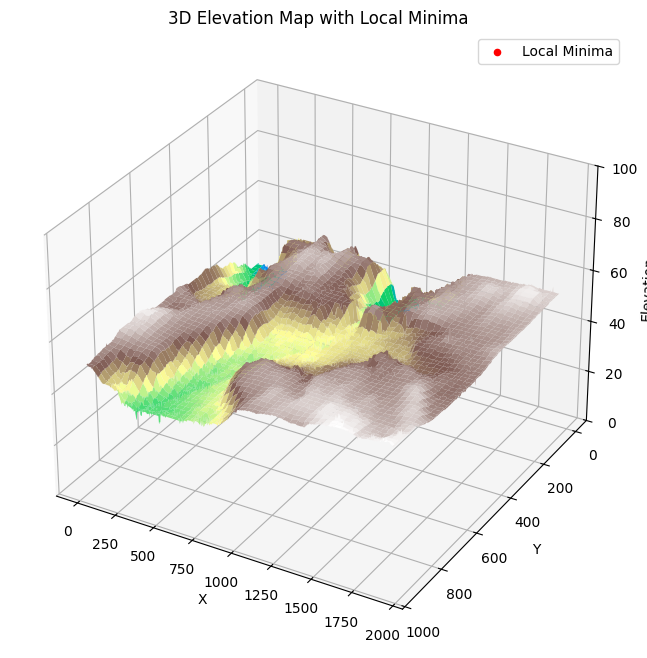

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 경로
image_path = r'C:\Users\andyj\Desktop\project\학교 수행평가\수2세특(편미분,극소값)\S-Map screen (6).png'

# 이미지 로드 (RGB)
img = Image.open(image_path)
img = img.convert("RGB")  # RGB로 변환

# 이미지 크기
width, height = img.size

# 이미지 데이터를 배열로 변환
img_data = np.array(img)

# 고도 맵을 만들기 위한 빈 배열
elevation_data = np.zeros((height, width))

# 색상 범위 설정 (초록 -> 빨강)
low_color = np.array([0, 255, 0])   # 초록색 (Low)
high_color = np.array([255, 0, 0])  # 빨간색 (High)

# 색을 고도로 변환 (0 ~ 255 -> 0 ~ 100 고도 예시, 고도 범위 줄이기)
for i in range(height):
    for j in range(width):
        color = img_data[i, j]
        
        # 색상의 차이를 계산하여 고도 값에 매핑
        diff_high = np.linalg.norm(color - high_color)
        diff_low = np.linalg.norm(color - low_color)
        
        # 두 색상 간의 차이 비율을 계산하여 고도 값으로 변환
        total_diff = diff_low + diff_high
        elevation_data[i, j] = 100 * (diff_low / total_diff)  # 고도 범위 0 ~ 100으로 줄이기 (좁게 설정)

# 경사 계산 (X, Y 방향으로 미분 계산)
dx = np.gradient(elevation_data, axis=1)  # X 방향 경사
dy = np.gradient(elevation_data, axis=0)  # Y 방향 경사

# 경사 크기 계산
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# 극솟값을 찾기 위한 임계값 설정 (경사 크기가 0에 가까운 값만)
threshold = np.percentile(gradient_magnitude, 1)  # 경사의 크기가 가장 작은 1%의 값 이하만 고려

# 극솟값 후보를 찾기
local_minima = (gradient_magnitude < threshold)

# 3D로 고도 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# X, Y 좌표 생성
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# 3D surface plot
ax.plot_surface(X, Y, elevation_data, cmap='terrain', edgecolor='none', alpha=1)

# 극솟값을 붉은 색으로 강조 (정확한 z 값에 맞게 표시)
z_local_minima = elevation_data[local_minima]  # 극솟값의 z 값을 가져옴
x_local_minima = X[local_minima]  # 극솟값의 x 좌표
y_local_minima = Y[local_minima]  # 극솟값의 y 좌표

# 극솟값을 3D 플롯에서 붉은 점으로 표시
ax.scatter(x_local_minima, y_local_minima, z_local_minima, color='r', s=20, label='Local Minima')

ax.set_title('3D Elevation Map with Local Minima')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')

# y축 반전
ax.invert_yaxis()

# Z축 범위 좁게 설정 (고도 범위를 0~100으로 설정)
ax.set_zlim(0, 100)

# 범례 추가
ax.legend()

plt.show()


C:\Users\andyj\AppData\Local\Temp\ipykernel_27084\3883445420.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


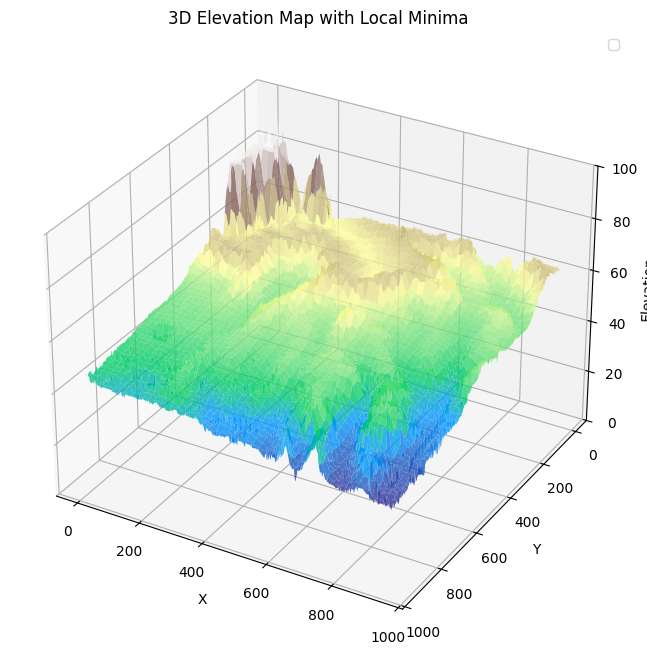

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 경로
image_path = r'C:\Users\andyj\Desktop\project\학교 수행평가\수2세특(편미분,극소값)\S-Map screen (1).png'

# 이미지 로드 (RGB)
img = Image.open(image_path)
img = img.convert("RGB")  # RGB로 변환

# 이미지 크기
width, height = img.size

# 이미지 데이터를 배열로 변환
img_data = np.array(img)

# 고도 맵을 만들기 위한 빈 배열
elevation_data = np.zeros((height, width))

# 색상 범위 설정 (초록 -> 빨강)
low_color = np.array([0, 255, 0])   # 초록색 (Low)
high_color = np.array([255, 0, 0])  # 빨간색 (High)

# 색을 고도로 변환 (0 ~ 255 -> 0 ~ 100 고도 예시, 고도 범위 줄이기)
for i in range(height):
    for j in range(width):
        color = img_data[i, j]
        
        # 색상의 차이를 계산하여 고도 값에 매핑
        diff_high = np.linalg.norm(color - high_color)
        diff_low = np.linalg.norm(color - low_color)
        
        # 두 색상 간의 차이 비율을 계산하여 고도 값으로 변환
        total_diff = diff_low + diff_high
        elevation_data[i, j] = 100 * (diff_low / total_diff)  # 고도 범위 0 ~ 100으로 줄이기 (좁게 설정)


# 3D로 고도 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# X, Y 좌표 생성
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# 3D surface plot
ax.plot_surface(X, Y, elevation_data, cmap='terrain', edgecolor='none', alpha=0.8)

ax.set_title('3D Elevation Map with Local Minima')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')

# y축 반전
ax.invert_yaxis()

# Z축 범위 좁게 설정 (고도 범위를 0~100으로 설정)
ax.set_zlim(0, 100)

# 범례 추가
ax.legend()

plt.show()


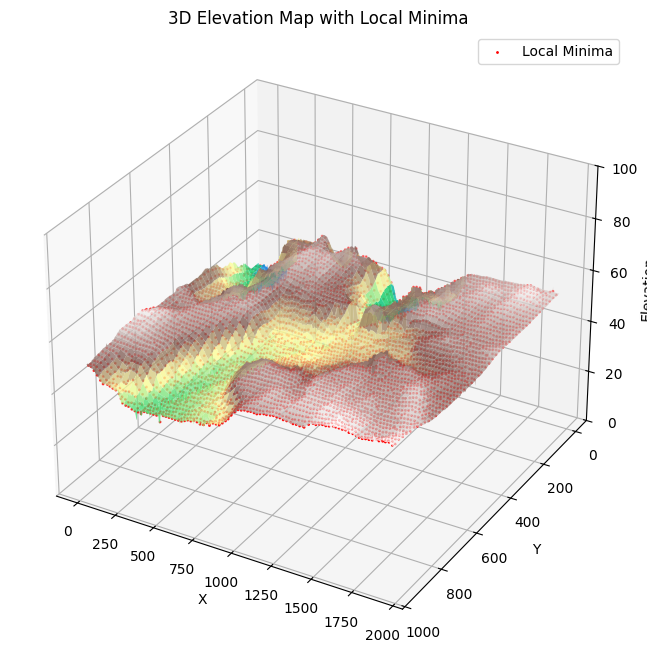

In [ ]:
# 경사 계산 (X, Y 방향으로 미분 계산)
dx = np.gradient(elevation_data, axis=1)  # X 방향 경사
dy = np.gradient(elevation_data, axis=0)  # Y 방향 경사

# 경사하강법을 이용한 극솟값 탐색 (편미분을 이용)
def gradient_descent(start_x, start_y, learning_rate=0.1, max_iters=100, threshold=1e-5):
    current_x, current_y = start_x, start_y
    points = [(current_x, current_y)]  # 경로 저장
    
    for _ in range(max_iters):
        # 고도 값과 경사 값
        grad_x = dx[int(current_y), int(current_x)]
        grad_y = dy[int(current_y), int(current_x)]
        
        # 경사 벡터의 크기 (수렴 조건)
        grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)
        
        # 경사하강법 업데이트 (부호 반대로 이동)
        current_x -= learning_rate * grad_x
        current_y -= learning_rate * grad_y
        
        # 경계 체크 (이미지 범위 내로 제한)
        current_x = np.clip(int(current_x), 0, width - 1)
        current_y = np.clip(int(current_y), 0, height - 1)
        
        points.append((current_x, current_y))
        
        # 경사 벡터의 크기가 일정 threshold 이하일 때 종료
        if grad_magnitude < threshold:
            break

    # 최종적으로 찾은 극솟값의 좌표와 고도 값 반환
    return int(current_x), int(current_y), elevation_data[int(current_y), int(current_x)]

# 10x10 그리드로 경사하강법 실행
local_minima_coords = []
grid_size = 20  # 10x10 그리드

for i in range(0, height, grid_size):
    for j in range(0, width, grid_size):
        # 각 구역의 중심에서 시작 (경계 체크)
        start_x = np.clip(j + grid_size // 2, 0, width - 1)
        start_y = np.clip(i + grid_size // 2, 0, height - 1)
        
        x_min, y_min, elevation = gradient_descent(start_x, start_y)
        
        # 같은 극소값이 여러 번 찾을 수 있으므로, 중복을 제거하기 위해 set 사용
        if (x_min, y_min) not in [(coord[0], coord[1]) for coord in local_minima_coords]:
            local_minima_coords.append((x_min, y_min, elevation))

# 3D로 고도 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# X, Y 좌표 생성
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# 3D surface plot
ax.plot_surface(X, Y, elevation_data, cmap='terrain', edgecolor='none', alpha=0.8)

# 극솟값을 붉은 색으로 강조 (정확한 z 값에 맞게 표시)
x_local_minima = [coord[0] for coord in local_minima_coords]
y_local_minima = [coord[1] for coord in local_minima_coords]
z_local_minima = [coord[2] for coord in local_minima_coords]

# 극솟값을 3D 플롯에서 붉은 점으로 표시
ax.scatter(x_local_minima, y_local_minima, z_local_minima, color='r', s=1, label='Local Minima')

ax.set_title('3D Elevation Map with Local Minima')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')

# y축 반전
ax.invert_yaxis()

# Z축 범위 좁게 설정 (고도 범위를 0~100으로 설정)
ax.set_zlim(0, 100)

# 범례 추가
ax.legend()

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from PIL import Image

# 이미지 경로
image_path = r'C:\Users\andyj\Desktop\project\수2세특(편미분,극소값)\S-Map screen (1).png'

# 이미지 로드 (RGB)
img = Image.open(image_path)
img = img.convert("RGB")  # RGB로 변환

# 이미지 크기
width, height = img.size

# 이미지 데이터를 배열로 변환
img_data = np.array(img)

# 고도 맵을 만들기 위한 빈 배열
elevation_data = np.zeros((height, width))

# 색상 범위 설정 (초록 -> 빨강)
low_color = np.array([0, 255, 0])   # 초록색 (Low)
high_color = np.array([255, 0, 0])  # 빨간색 (High)

# 색을 고도로 변환 (0 ~ 255 -> 0 ~ 100 고도 예시, 고도 범위 줄이기)
for i in range(height):
    for j in range(width):
        color = img_data[i, j]
        
        # 색상의 차이를 계산하여 고도 값에 매핑
        diff_high = np.linalg.norm(color - high_color)
        diff_low = np.linalg.norm(color - low_color)
        
        # 두 색상 간의 차이 비율을 계산하여 고도 값으로 변환
        total_diff = diff_low + diff_high
        elevation_data[i, j] = 100 * (diff_low / total_diff)  # 고도 범위 0 ~ 100으로 줄이기 (좁게 설정)

# x, y, z 값 추출 (이미지 좌표와 고도 값)
x_values = []
y_values = []
z_values = []

for i in range(height):
    for j in range(width):
        x_values.append(j)  # x 좌표 (이미지에서의 열)
        y_values.append(i)  # y 좌표 (이미지에서의 행)
        z_values.append(elevation_data[i, j])  # 고도 값

# 데이터를 DataFrame으로 변환
data = {'x': x_values, 'y': y_values, 'z': z_values}
df = pd.DataFrame(data)

# CSV 파일로 저장
output_file = r'C:\Users\andyj\Desktop\(1).csv'
df.to_csv(output_file, index=False)

print(f"x, y, z 값이 CSV 파일로 저장되었습니다: {output_file}")


x, y, z 값이 CSV 파일로 저장되었습니다: C:\Users\andyj\Desktop\(1).csv


C:\Users\andyj\AppData\Local\Temp\ipykernel_27084\3582403889.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


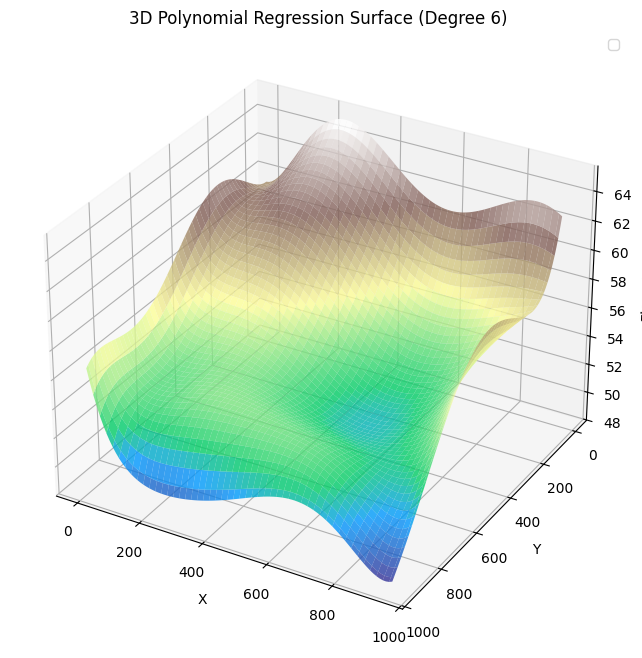

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# CSV 파일 경로
csv_file = r'C:\Users\andyj\Desktop\project\학교 수행평가\수2세특(편미분,극소값)\(5).csv'

# CSV 파일 읽기
data = pd.read_csv(csv_file)

# x, y, z 값 추출
X = data[['x', 'y']].values  # x, y 값
z = data['z'].values  # z 값 (고도)

# 다항식 차수 설정 (3차 다항식)
poly = PolynomialFeatures(degree=6)  # 6차로 변경
X_poly = poly.fit_transform(X)

# 선형 회귀 모델
model = LinearRegression()
model.fit(X_poly, z)

# 다변수 함수의 계수 (식에 포함될 항들)
coefficients = model.coef_
intercept = model.intercept_

# 3D 플롯을 위한 그리드 설정
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# 다항 회귀식에 의해 예측된 z 값 계산
X_grid = np.column_stack((x_grid.ravel(), y_grid.ravel()))
X_grid_poly = poly.transform(X_grid)
z_grid = model.predict(X_grid_poly).reshape(x_grid.shape)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D surface plot
ax.plot_surface(x_grid, y_grid, z_grid, cmap='terrain', edgecolor='none', alpha=0.8)

# 기존 데이터 점을 빨간색으로 표시
#ax.scatter(X[:, 0], X[:, 1], z, color='r', label='Data Points')

# 제목 및 축 레이블 설정
ax.set_title('3D Polynomial Regression Surface (Degree 6)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')

# y축 반전
ax.invert_yaxis()
# 범례 추가
ax.legend()

plt.show()


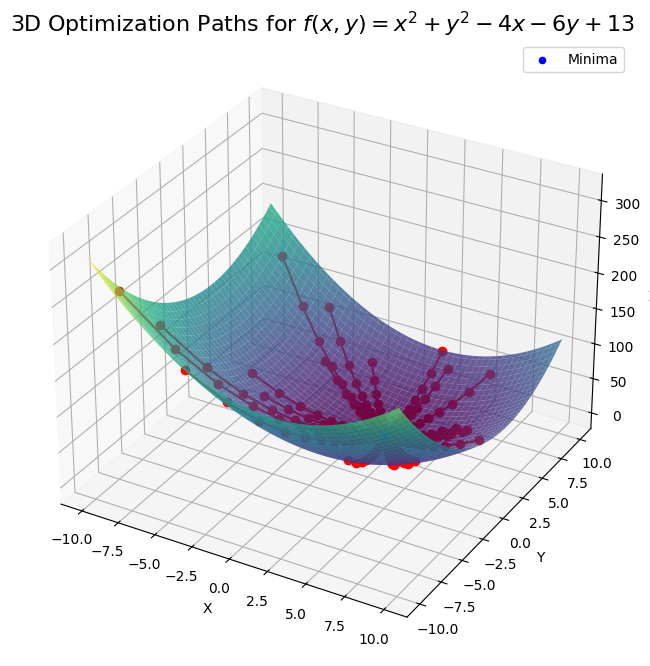

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 다변수 함수 정의
def func(x, y):
    return x**2 + y**2 - 4*x - 6*y + 13

# 경사 계산
def gradient(x, y):
    grad_x = 2*x - 4  # f를 x로 편미분
    grad_y = 2*y - 6  # f를 y로 편미분
    return np.array([grad_x, grad_y])

# 경사 하강법
def gradient_descent(start_point, learning_rate=0.1, threshold=1e-5, max_iterations=1000):
    point = np.array(start_point)
    points = [point]  # 경로 저장
    for _ in range(max_iterations):
        grad = gradient(*point)
        next_point = point - learning_rate * grad
        points.append(next_point)
        if np.linalg.norm(grad) < threshold:
            break
        point = next_point
    return points

# 경계 범위 설정
bounds_x = (-10, 10)  # x 범위
bounds_y = (-10, 10)  # y 범위

# 랜덤 시작점 생성
num_points = 20  # 탐색할 점 개수
random_start_points = [
    [
        np.random.uniform(bounds_x[0], bounds_x[1]),
        np.random.uniform(bounds_y[0], bounds_y[1])
    ]
    for _ in range(num_points)
]

# 모든 경로와 최종 극소값 저장
all_paths = []
final_minima = []

for start in random_start_points:
    path = gradient_descent(start)
    all_paths.append(np.array(path))
    final_minima.append(path[-1])

# 3D 그래프 생성
x_vals = np.linspace(bounds_x[0], bounds_x[1], 100)
y_vals = np.linspace(bounds_y[0], bounds_y[1], 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = func(X_grid, Y_grid)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.8)

# 각 경로를 그래프에 표시
for path in all_paths:
    path_x, path_y = path[:, 0], path[:, 1]
    path_z = func(path_x, path_y)
    ax.plot(path_x, path_y, path_z, color='red', marker='o')

# 최종 극소값 시각화
final_x = [point[0] for point in final_minima]
final_y = [point[1] for point in final_minima]
final_z = func(np.array(final_x), np.array(final_y))
ax.scatter(final_x, final_y, final_z, color='blue', label='Minima', s=20)

# 설정
ax.set_title("3D Optimization Paths for $f(x, y) = x^2 + y^2 - 4x - 6y + 13$", fontsize=16)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

plt.show()


다변수 함수식:
                        6                         5                            ↪
- 6.46667303581296e-18⋅x  + 7.22520692194694e-17⋅x ⋅y - 3.05077830232689e-15⋅x ↪

↪ 5                         4  2                         4                     ↪
↪   - 3.88010440665026e-17⋅x ⋅y  - 2.63519353372858e-13⋅x ⋅y + 8.1258475500253 ↪

↪        4                         3  3                        3  2            ↪
↪ 9e-11⋅x  - 1.01107192862308e-16⋅x ⋅y  + 2.4362061755287e-13⋅x ⋅y  + 2.302408 ↪

↪               3                          3                         2  4      ↪
↪ 19273628e-10⋅x ⋅y - 1.22280227541833e-7⋅x  + 4.73915297948251e-17⋅x ⋅y  + 6. ↪

↪                     2  3                         2  2                        ↪
↪ 10053141605757e-14⋅x ⋅y  - 2.00958063917042e-10⋅x ⋅y  - 3.2504810549032e-10⋅ ↪

↪  2                          2                           5                    ↪
↪ x ⋅y + 4.64510061762729e-5⋅x  - 5.03428177416218e-16⋅x⋅y  + 9.65205394091251 ↪

↪         4  

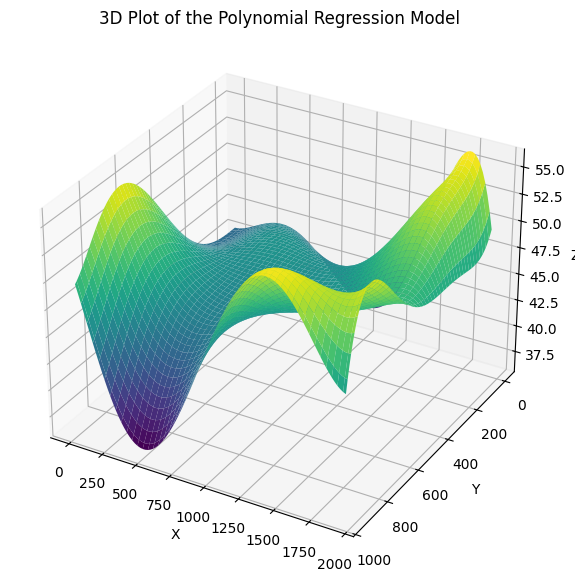

-6.46667303581296e-18*x**6 + 7.22520692194694e-17*x**5*y - 3.05077830232689e-15*x**5 - 3.88010440665026e-17*x**4*y**2 - 2.63519353372858e-13*x**4*y + 8.12584755002539e-11*x**4 - 1.01107192862308e-16*x**3*y**3 + 2.4362061755287e-13*x**3*y**2 + 2.30240819273628e-10*x**3*y - 1.22280227541833e-7*x**3 + 4.73915297948251e-17*x**2*y**4 + 6.10053141605757e-14*x**2*y**3 - 2.00958063917042e-10*x**2*y**2 - 3.2504810549032e-10*x**2*y + 4.64510061762729e-5*x**2 - 5.03428177416218e-16*x*y**5 + 9.65205394091251e-13*x*y**4 - 4.73708216008684e-10*x*y**3 - 4.75086917864615e-8*x*y**2 + 1.18821049450387e-5*x*y + 8.71875482166268e-7*x + 3.07046427479171e-16*y**6 - 5.13782506289451e-13*y**5 + 1.03073766965107e-10*y**4 + 1.10537886233513e-7*y**3 - 4.91909398341775e-7*y**2 - 3.08432305668578e-8*y + 43.0162884865778

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sympy as sp

# CSV 파일 경로
csv_file = r'C:\Users\andyj\Desktop\project\학교 수행평가\수2세특(편미분,극소값)\(6).csv'

# CSV 파일 읽기
data = pd.read_csv(csv_file)

# x, y, z 값 추출
X = data[['x', 'y']].values  # x, y 값
z = data['z'].values  # z 값 (고도)

# 다항식 차수 설정 (6차 다항식)
poly = PolynomialFeatures(degree=6)  # 6차로 변경
X_poly = poly.fit_transform(X)

# 선형 회귀 모델
model = LinearRegression()
model.fit(X_poly, z)

# 다항식 계수와 절편
coefficients = model.coef_
intercept = model.intercept_

# SymPy를 이용해 다변수 함수 생성
x, y = sp.symbols('x y')
terms = poly.get_feature_names_out(['x', 'y'])  # 다항식 항 이름
func_expr = intercept  # 상수항부터 시작

for term, coef in zip(terms, coefficients):
    if coef != 0:  # 계수가 0이 아닌 경우에만 추가
        # 'x y' → 'x*y'로 바꾸고, '^'를 '**'로 변경
        term = term.replace(' ', '*')  # 공백을 '*'로 변환
        term = term.replace('^', '**')  # ^를 **로 변경
        term_expr = sp.sympify(term)  # SymPy로 변환
        func_expr += coef * term_expr

# 생성된 함수식 출력
print("다변수 함수식:")
sp.pprint(func_expr)

# SymPy 표현식을 함수로 변환
f = sp.lambdify((x, y), func_expr, 'numpy')

# x, y 값의 범위 설정
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)

# meshgrid로 x, y 값 만들기
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# z 값을 다변수 함수에서 계산
Z_grid = f(X_grid, Y_grid)

# 3D 플로팅
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D surface plot
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis')

# 라벨 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# y축 반전
ax.invert_yaxis()

# 타이틀 설정
ax.set_title('3D Plot of the Polynomial Regression Model')

# 플로팅
plt.show()

func_expr


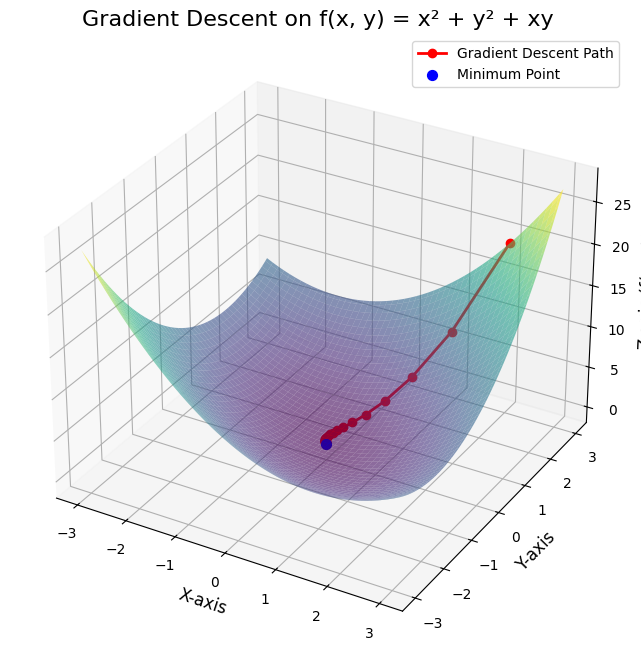

최종 점: (-0.002576842642033991, 0.0025769325652861227)


In [173]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 목적 함수
def f(x, y):
    return x**2 + y**2 + x*y

# 편미분 (Gradient)
def grad_f(x, y):
    df_dx = 2 * x + y  # f를 x에 대해 편미분
    df_dy = 2 * y + x  # f를 y에 대해 편미분
    return np.array([df_dx, df_dy])

# 경사하강법
def gradient_descent(learning_rate=0.1, epochs=100, initial_point=(1, 1)):
    x, y = initial_point  # 초기값 설정
    path = [(x, y)]  # 각 단계의 값을 저장

    for _ in range(epochs):
        grad = grad_f(x, y)  # 기울기 계산
        x -= learning_rate * grad[0]  # x 업데이트
        y -= learning_rate * grad[1]  # y 업데이트
        path.append((x, y))  # 경로 저장
    
    return (x, y), path  # 최종 점과 경로 반환

# 3D Plot setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the function
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + X*Y

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Gradient descent path in 3D
final_point, path = gradient_descent(learning_rate=0.1, epochs=50, initial_point=(2, 3))
path_z = [xi**2 + yi**2 + xi*yi for xi, yi in path]  # Compute function values along the path
path_x, path_y = zip(*path)  # Separate x and y coordinates
ax.plot(path_x, path_y, path_z, color='r', linewidth=2, marker='o', label='Gradient Descent Path')

# Highlight the minimum point
ax.scatter(0, 0, 0, color='b', s=50, label='Minimum Point')

# Labels and title
ax.set_title('Gradient Descent on f(x, y) = x² + y² + xy', fontsize=16)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('Z-axis (f(x, y))', fontsize=12)
ax.legend()

plt.show()

# 실행
print(f"최종 점: {final_point}")


Start 1 - Epoch 0, x: 280.0499572753906, y: 2.049994707107544, loss: 65.24943542480469
Start 1 - Epoch 100, x: 285.292724609375, y: 7.029336929321289, loss: 65.06887817382812
Start 1 - Epoch 200, x: 291.1018371582031, y: 11.957417488098145, loss: 64.88188171386719
Start 1 - Epoch 300, x: 297.3274841308594, y: 16.841449737548828, loss: 64.68700408935547
Start 1 - Epoch 400, x: 303.8321533203125, y: 21.688732147216797, loss: 64.48370361328125
Start 1 - Epoch 500, x: 310.5117492675781, y: 26.505210876464844, loss: 64.27200317382812
Start 1 - Epoch 600, x: 317.2900390625, y: 31.295778274536133, loss: 64.05231475830078
Start 1 - Epoch 700, x: 324.1115417480469, y: 36.0644645690918, loss: 63.8253173828125
Start 1 - Epoch 800, x: 330.9366760253906, y: 40.81464385986328, loss: 63.59180450439453
Start 1 - Epoch 900, x: 337.7364807128906, y: 45.54909896850586, loss: 63.35262680053711
Start 1 - Epoch 1000, x: 344.4908142089844, y: 50.27018356323242, loss: 63.108642578125
Start 1 - Epoch 1100, x: 

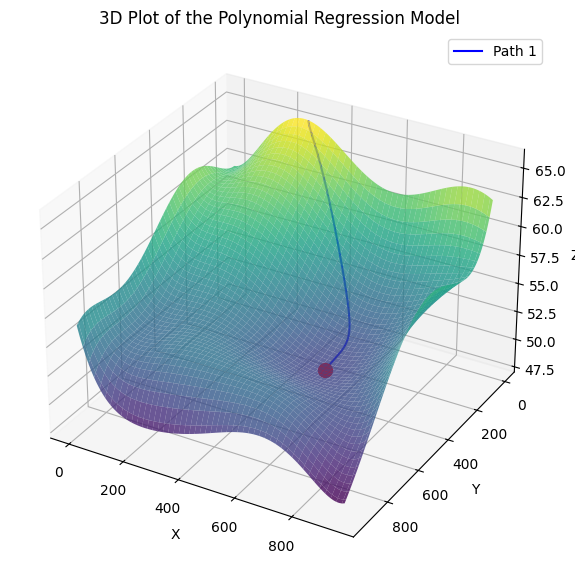

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sympy as sp
import tensorflow as tf

# CSV 파일 경로
csv_file = r'C:\Users\andyj\Desktop\project\학교 수행평가\수2세특(편미분,극소값)\(5).csv'

# CSV 파일 읽기
data = pd.read_csv(csv_file)

# x, y, z 값 추출
X = data[['x', 'y']].values  # x, y 값
z = data['z'].values  # z 값 (고도)

# 다항식 차수 설정 (6차 다항식)
poly = PolynomialFeatures(degree=6)  # 6차로 변경
X_poly = poly.fit_transform(X)

# 선형 회귀 모델
model = LinearRegression()
model.fit(X_poly, z)

# 다항식 계수와 절편
coefficients = model.coef_
intercept = model.intercept_

# SymPy를 이용해 다변수 함수 생성
x, y = sp.symbols('x y')
terms = poly.get_feature_names_out(['x', 'y'])  # 다항식 항 이름
func_expr = intercept  # 상수항부터 시작

for term, coef in zip(terms, coefficients):
    if coef != 0:  # 계수가 0이 아닌 경우에만 추가
        term = term.replace(' ', '*')  # 공백을 '*'로 변환
        term = term.replace('^', '**')  # ^를 **로 변경
        term_expr = sp.sympify(term)  # SymPy로 변환
        func_expr += coef * term_expr

# SymPy 표현식을 TensorFlow 함수로 변환
f = sp.lambdify((x, y), func_expr, 'numpy')
"""
# 5개의 랜덤 초기 시작점 생성
init_points = np.random.uniform(low=[min(X[:, 0]), min(X[:, 1])],
                                high=[max(X[:, 0]), max(X[:, 1])],
                                size=(1, 2))  # 5개 랜덤 시작점
"""

# 사용자 지정 초기 시작점
init_points = np.array([[280.0, 2.0]])



# 경사하강법 진행 중 경로 기록
x_vals_paths = []  # 각 초기점에 대한 경로 저장
y_vals_paths = []  # 각 초기점에 대한 경로 저장
red_points = []  # 빨간 점을 저장할 리스트

# 1. 초기 범위 구하기 (한 번만)
x_min, x_max = min(X[:, 0]), max(X[:, 0])
y_min, y_max = min(X[:, 1]), max(X[:, 1])

# 2. 경사하강법 반복 수행
epochs = 25000
for i, point in enumerate(init_points):
    # 각 초기점에서 시작
    x_var = tf.Variable(point[0], dtype=tf.float32)
    y_var = tf.Variable(point[1], dtype=tf.float32)

    # 옵티마이저를 매번 새로 생성
    optimizer = tf.optimizers.Adam(learning_rate=0.05)  # 학습률 0.05로 설정

    # 경로 기록
    x_vals_path = []  # 각 초기점에 대한 x 값 경로
    y_vals_path = []  # 각 초기점에 대한 y 값 경로

    for epoch in range(epochs):
        # 경사하강법 단계 실행
        with tf.GradientTape() as tape:
            # 함수 값 계산
            z_val = f(x_var, y_var)
            loss = z_val  # 최적화할 대상 함수 (예: 손실 함수)

        gradients = tape.gradient(loss, [x_var, y_var])
        optimizer.apply_gradients(zip(gradients, [x_var, y_var]))

        # 경로 저장
        x_vals_path.append(x_var.numpy())
        y_vals_path.append(y_var.numpy())

        # 중간에 경계를 벗어나면 시행을 종료
        if not (x_min <= x_var.numpy() <= x_max and y_min <= y_var.numpy() <= y_max):
            print(f"Start {i+1} - Epoch {epoch}, x: {x_var.numpy()}, y: {y_var.numpy()} - Out of bounds!")
            red_points.append((x_var.numpy(), y_var.numpy()))  # 경계를 벗어난 지점 기록
            break

        if epoch % 100 == 0:
            print(f"Start {i+1} - Epoch {epoch}, x: {x_var.numpy()}, y: {y_var.numpy()}, loss: {f(x_var, y_var)}")

    # 시행이 끝났을 때, 경계를 벗어나지 않은 경우에만 빨간 점을 추가
    if len(x_vals_path) > 0 and len(y_vals_path) > 0:
        # 경계를 벗어나지 않았다면 빨간 점 추가
        red_points.append((x_var.numpy(), y_var.numpy()))  # 시행 끝난 후 극소값 추가
        x_vals_paths.append(x_vals_path)
        y_vals_paths.append(y_vals_path)

# 최적화된 값 출력
print(f"최적화된 값: x = {x_var.numpy()}, y = {y_var.numpy()}")

# 3D 시각화
# x, y 값의 범위 설정
x_vals = np.linspace(x_min, x_max, 100)
y_vals = np.linspace(y_min, y_max, 100)

# meshgrid로 x, y 값 만들기
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# z 값을 다변수 함수에서 계산
Z_grid = f(X_grid, Y_grid)

# 3D 플로팅
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D surface plot
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.8)

# 최적화된 값 표시
for red_point in red_points:
    ax.scatter(red_point[0], red_point[1], f(red_point[0], red_point[1]), color='r', s=100)  # 빨간 점 표시

# 각 초기점에 대한 경로 표시
for i in range(len(x_vals_paths)):
    ax.plot(x_vals_paths[i], y_vals_paths[i], f(np.array(x_vals_paths[i]), np.array(y_vals_paths[i])), color='b', label=f"Path {i+1}")

# 라벨 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# y축 반전
ax.invert_yaxis()

# 타이틀 설정
ax.set_title('3D Plot of the Polynomial Regression Model')

# 레전드 표시
ax.legend()

# 플로팅
plt.show()
